In [37]:
import numpy as np
import os
import nltk
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from sklearn.decomposition import SparsePCA
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import random
from sklearn.feature_extraction.text import TfidfVectorizer
import math
from sklearn.model_selection import train_test_split

# PART A

In [38]:
input_file = 'review.txt'
f = open(input_file, 'r')
text = f.read()
f.close()

In [39]:
input_data=text.split('\n')
random.shuffle(input_data)
for i in range (len(input_data)):
    input_data[i]=input_data[i].strip()


In [40]:
y_vector=[]
for i in range(len(input_data)):
    y_vector.append(int(input_data[i][-1]))
    input_data[i]=input_data[i][:-1]
    input_data[i]=input_data[i].strip()
    input_data[i]=input_data[i].lower()

input_data = np.array(input_data)
y_vector = np.array(y_vector)
print(np.shape(input_data))

(1000,)


In [41]:

train_X=input_data[:750,]
test_X=input_data[750:,]
train_Y=y_vector[:750,]
test_Y=y_vector[750:,]
print(np.shape(train_Y))


(750,)


In [42]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(train_X)
np.shape(result)

(750, 2585)

In [43]:
#PCA
n_components = 30
pca_text = SparsePCA(n_components = n_components)
X = pca_text.fit_transform(result.toarray())
X.shape

(750, 30)

In [44]:


val_X=X[:125,]
val_Y=train_Y[:125,]
train_X=X[125:,]
train_Y=train_Y[125:,]

print(np.shape(train_X))

(625, 30)


# PART B

In [45]:
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(test_X)
np.shape(result)

(250, 1255)

In [46]:
#PCA
n_components = 30
pca_text = SparsePCA(n_components = n_components)
test_X= pca_text.fit_transform(result.toarray())
X.shape

(750, 30)

# PART C

In [47]:
class logistic_regression:
    learning_rate=0
    batch_size=0
    weight=np.zeros(n_components)
    bias=0
    loss_array_train=np.zeros(20)
    loss_array_val=np.zeros(20)
    def __init__(self,learning_rate,batch_size):
        self.learning_rate=learning_rate
        self.batch_size=batch_size
        for i in range(0,n_components):
            temp=0.01 * np.random.randn(1)
            self.weight[i]=temp[0]
        
    def sigmoid(self,X):
        for i in range(0,len(X)):
            X[i]= 1/(1 + np.exp(-X[i]))
        return X
        
    
    def forward_pass(self,X):
        
        temp=np.matmul(X,self.weight)+self.bias

        
        
        return temp
    def error(self,y_n,t_n,x_n):

        temp1=y_n-t_n
        dw=np.matmul(np.transpose(temp1),x_n)
        db=np.sum(temp1)
        return (np.transpose(dw),db)
    def backward_pass(self,dw,db):
        self.weight=self.weight-self.learning_rate*dw
        self.bias=self.bias-self.learning_rate*db
    def calculate_accuracy(self):
        
        correct=0
        temp1=self.forward_pass(test_X)
        temp2=self.sigmoid(temp1)
        class_predict=np.zeros(len(test_X))
        for i in range(0,len(test_X)):
            if(temp2[i]>=0.5):
                class_predict[i]=0
            else:
                class_predict[i]=1
            if(class_predict[i]==test_Y[i]):
                correct=correct+1
        accuracy=(correct/len(test_X))*100
        print('accuracy is ',accuracy,'%')
    def calculate_loss_value(self,X,Y):
        loss=0
        temp1=self.forward_pass(X)
        temp2=self.sigmoid(temp1)
        temp3=np.log(temp1)
        temp4=np.log(1-temp1)
        for i in range(0,len(X)):
                t1=Y[i]*temp3[i]
                t2=(1-Y[i])*temp4[i]
                loss=loss+t1+t2
        loss=loss*-1
        return loss
        
    def SGD(self):   
        for epoch in range(0,20):
            
            for i in range(0,len(train_X),self.batch_size):
                
                start_index=i
                end_index=i+self.batch_size
                if(end_index>len(train_X)):
                    end_index=len(train_X)
                    

               
                current_X=train_X[start_index:end_index,]
                current_Y=train_Y[start_index:end_index,]
                temp1=self.forward_pass(current_X)
                temp2=self.sigmoid(temp1)
                dw,db=self.error(temp2,current_Y,current_X)
                self.backward_pass(dw,db) 
            self.loss_array_train[epoch]=self.calculate_loss_value(train_X,train_Y)
            self.loss_array_val[epoch]=self.calculate_loss_value(val_X,val_Y)
                    
    def plot_loss_curve(self):
        x=[(i) for i in range(1,21)]
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.title('loss curve for validation data')
        plt.plot(x,self.loss_array_val)
        plt.show()
    
    def plot_loss_curve_train(self):
        x=[(i) for i in range(1,21)]
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.title('loss curve for train data')
        plt.plot(x,self.loss_array_train)
        plt.show()
        
    def loss_per_epoch(self):
        print('loss value for train data per epoch :')
        print(self.loss_array_train)
        print('loss value for validation data per epoch :')
        print(self.loss_array_val)
        
            
            
        
    

plot for learning rate : 0.001 and batch size : 32


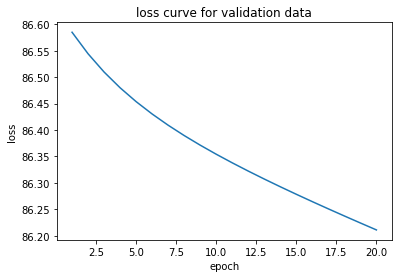

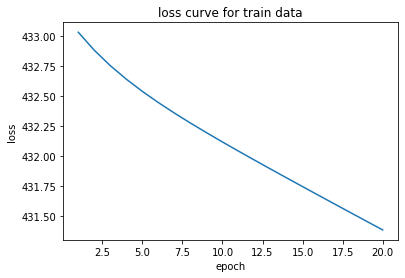

accuracy is  55.60000000000001 %
loss value for train data per epoch :
[433.03064808 432.88079466 432.7525374  432.63992043 432.53861905
 432.44549654 432.35828072 432.27532821 432.19545253 432.11779895
 432.04175332 431.9668757  431.89285221 431.8194599  431.74654133
 431.67398613 431.60171762 431.52968314 431.45784709 431.38618588]
loss value for validation data per epoch :
[86.58499661 86.54429265 86.50976847 86.47996142 86.45377453 86.43038211
 86.40916024 86.38963536 86.37144638 86.35431653 86.33803257 86.32242923
 86.30737769 86.29277691 86.27854718 86.26462519 86.25096038 86.2375121
 86.22424749 86.21113987]
plot for learning rate : 0.001 and batch size : 64


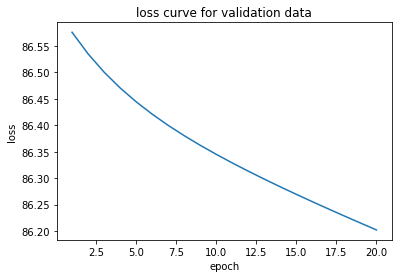

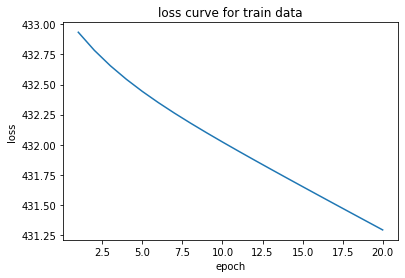

accuracy is  55.60000000000001 %
loss value for train data per epoch :
[432.93389753 432.78407619 432.65597552 432.54358274 432.44253768
 432.34968218 432.26273172 432.18003634 432.10040657 432.02298682
 431.94716327 431.87249702 431.79867543 431.72547688 431.65274522
 431.58037122 431.5082792  431.43641738 431.36475086 431.29325666]
loss value for validation data per epoch :
[86.57589318 86.53508152 86.5004959  86.47065822 86.44446103 86.42107162
 86.39986134 86.38035351 86.36218494 86.34507751 86.32881706 86.31323774
 86.29821038 86.28363368 86.26942781 86.25552936 86.24188772 86.22846225
 86.21522007 86.2021345 ]
plot for learning rate : 0.001 and batch size : 128


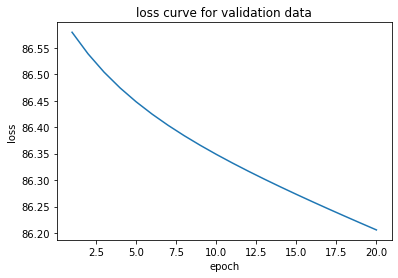

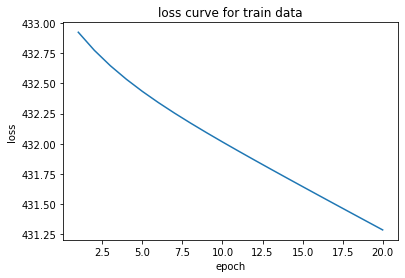

accuracy is  55.60000000000001 %
loss value for train data per epoch :
[432.92495275 432.7752002  432.64721339 432.53493713 432.43399026
 432.34120632 432.25429962 432.17162277 432.09199049 432.01455181
 431.93869732 431.86399196 431.79012631 431.7168813  431.64410271
 431.57168276 431.49954677 431.42764362 431.3559388  431.28440951]
loss value for validation data per epoch :
[86.57939718 86.53855787 86.50397247 86.47414958 86.44797377 86.42460768
 86.4034201  86.38393305 86.36578279 86.3486911  86.33244391 86.31687559
 86.3018572  86.28728771 86.27308748 86.25919332 86.24555479 86.23213137
 86.21889032 86.20580506]
plot for learning rate : 0.01 and batch size : 32


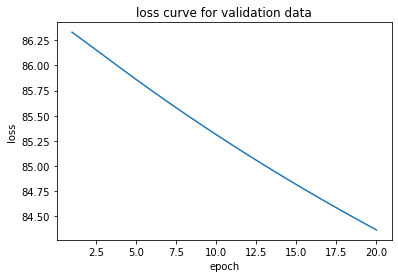

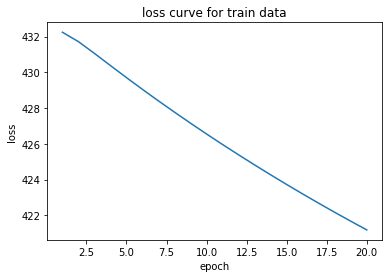

accuracy is  55.60000000000001 %
loss value for train data per epoch :
[432.24330991 431.71730624 431.05858326 430.37790807 429.705114
 429.04604242 428.4015007  427.77130026 427.1550647  426.55238974
 425.96287489 425.38612964 424.82177472 424.26944227 423.72877573
 423.19942976 422.68107003 422.17337305 421.67602594 421.18872616]
loss value for validation data per epoch :
[86.32875331 86.21271289 86.09462771 85.97638436 85.85999074 85.7458587
 85.63402206 85.52443849 85.41705173 85.31180396 85.20863833 85.10749941
 85.00833329 84.91108756 84.81571134 84.72215521 84.63037121 84.54031282
 84.45193492 84.36519374]
plot for learning rate : 0.01 and batch size : 64


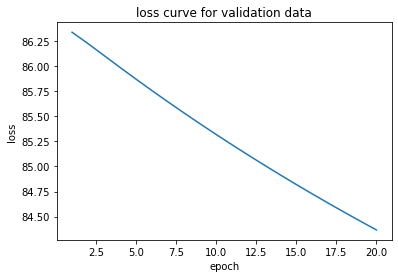

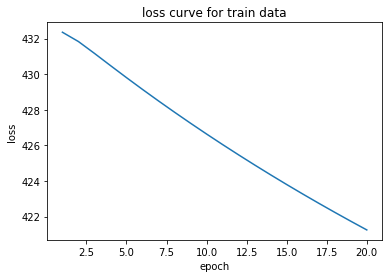

accuracy is  55.60000000000001 %
loss value for train data per epoch :
[432.35148991 431.82935816 431.16476497 430.47975376 429.8036155
 429.14159397 428.4942931  427.86146643 427.24272038 426.63764373
 426.04583146 425.46688912 424.90043368 424.34609357 423.80350865
 423.27233003 422.75221996 422.24285158 421.74390875 421.25508578]
loss value for validation data per epoch :
[86.33870972 86.22495791 86.10630316 85.98728376 85.8701486  85.75530847
 85.64278901 85.53254454 85.42451743 85.31864912 85.21488213 85.11316048
 85.01342969 84.91563682 84.81973043 84.72566059 84.63337882 84.54283809
 84.45399278 84.36679865]
plot for learning rate : 0.01 and batch size : 128


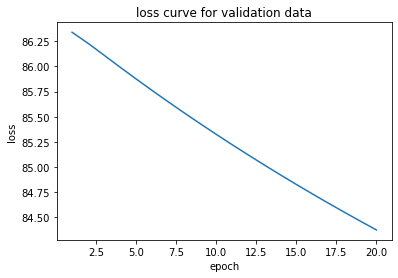

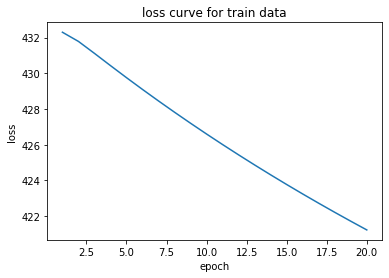

accuracy is  55.60000000000001 %
loss value for train data per epoch :
[432.29449619 431.78136303 431.11193172 430.42693346 429.75267499
 429.09294589 428.4479555  427.8173675  427.20077093 426.59775306
 426.00791075 425.43085213 424.86619693 424.31357636 423.77263306
 423.24302093 422.72440495 422.21646098 421.71887555 421.2313456 ]
loss value for validation data per epoch :
[86.33837142 86.22886473 86.11037686 85.99159301 85.87480592 85.76033946
 85.64819081 85.53830733 85.43063002 85.32510017 85.22166047 85.12025513
 85.02082991 84.92333211 84.82771053 84.73391549 84.64189874 84.55161351
 84.46301442 84.37605748]
plot for learning rate : 0.1 and batch size : 32


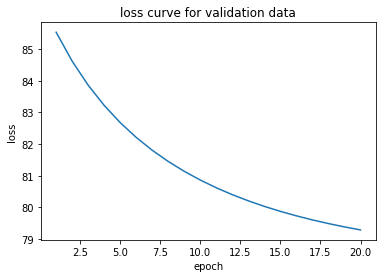

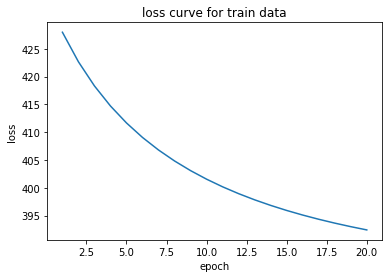

accuracy is  56.39999999999999 %
loss value for train data per epoch :
[427.9922807  422.67322198 418.32951182 414.71880168 411.6697289
 409.06026545 406.80188003 404.82889544 403.09149714 401.55112153
 400.17736582 398.94587455 397.83686265 396.83406109 395.92394911
 395.09518465 394.33817468 393.64474604 393.00788976 392.42155997]
loss value for validation data per epoch :
[85.52861684 84.61488794 83.85665761 83.21897575 82.67620491 82.20944646
 81.80456193 81.4507789  81.13973591 80.86482941 80.62076214 80.40322584
 80.20867415 80.03415689 79.87719714 79.73569836 79.60787319 79.49218814
 79.38731995 79.29212094]
plot for learning rate : 0.1 and batch size : 64


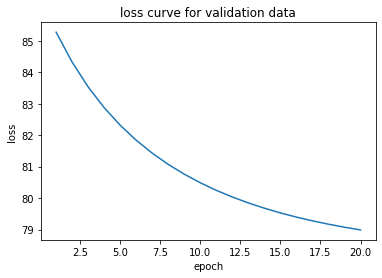

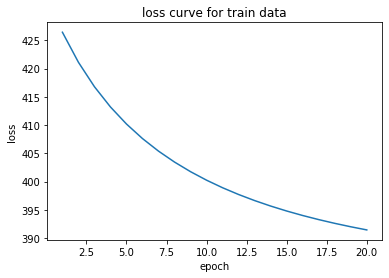

accuracy is  56.8 %
loss value for train data per epoch :
[426.41698173 421.10136132 416.77696739 413.19452859 410.1785658
 407.60470842 405.3830988  403.44730206 401.74706308 400.24355563
 398.90621515 397.71058264 396.63680392 395.6685619  394.79230128
 393.99665468 393.2720104  392.61018182 392.0041507  391.44786554]
loss value for validation data per epoch :
[85.27394725 84.32037484 83.53247896 82.87317564 82.31516694 81.83826148
 81.42730686 81.07072918 80.75952872 80.48658985 80.24620166 80.03371955
 79.84532205 79.67783283 79.52858817 79.39533671 79.27616232 79.16942416
 79.07370937 78.98779533]
plot for learning rate : 0.1 and batch size : 128


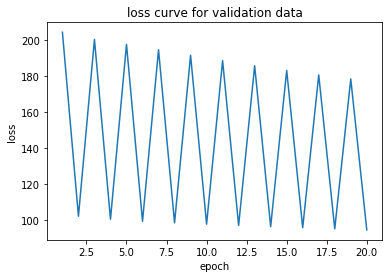

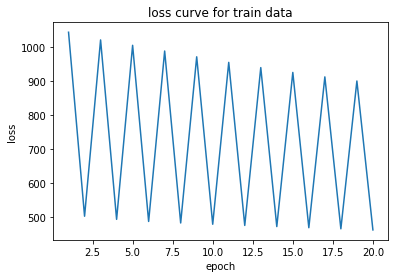

accuracy is  44.4 %
loss value for train data per epoch :
[1044.12329538  501.92391852 1021.4947665   492.72025332 1005.63539324
  486.54827706  988.79665758  482.06078072  971.75417909  478.30869292
  955.31987294  474.8237815   939.93127225  471.43737442  925.69687062
  468.11032989  912.56688115  464.83567091  900.44656066  461.60123631]
loss value for validation data per epoch :
[204.23724328 102.19824401 200.2292609  100.54815842 197.49668527
  99.40086399 194.52806807  98.54142107 191.47375933  97.81124205
 188.49289872  97.13222911 185.6738418   96.47793687 183.0425358
  95.84349376 180.59491053  95.2280903  178.31812044  94.62861265]


In [48]:
batch_size_lst=[32,64,128]
learning_rate_lst=[1e-3,1e-2,1e-1]
for l_rate in learning_rate_lst:
    for batch_s in batch_size_lst:
        print("plot for learning rate :",l_rate,"and batch size :",batch_s)
        obj=logistic_regression(l_rate,batch_s)
        obj.SGD()
        obj.plot_loss_curve()
        obj.plot_loss_curve_train()
        obj.calculate_accuracy()
        obj.loss_per_epoch()


Max accuracy achieved: 56.8% for learning rate : 0.1 and batch size : 64

# PART D

In [34]:
class logistic_regression_regularisation:
    learning_rate=0
    batch_size=0
    weight=np.zeros(n_components)
    bias=0
    loss_array_train=np.zeros(20)
    loss_array_val=np.zeros(20)
    reg_coeff=0
    def __init__(self,learning_rate,batch_size,reg_coeff):
        self.learning_rate=learning_rate
        self.batch_size=batch_size
        self.reg_coeff=reg_coeff
        for i in range(0,n_components):
            temp=0.01 * np.random.randn(1)
            self.weight[i]=temp[0]
        
    def sigmoid(self,X):
        for i in range(0,len(X)):
            X[i]= 1/(1 + np.exp(-X[i]))
        return X
        
    
    def forward_pass(self,X):
        
        temp=np.matmul(X,self.weight)+self.bias

        
        
        return temp
    def error(self,y_n,t_n,x_n):

        temp1=y_n-t_n
        dw=np.matmul(np.transpose(temp1),x_n)+(self.weight*self.reg_coeff)
        db=np.sum(temp1)
        return (np.transpose(dw),db)
    def backward_pass(self,dw,db):
        self.weight=self.weight-self.learning_rate*dw
        self.bias=self.bias-self.learning_rate*db
    def calculate_accuracy(self):
        
        correct=0
        temp1=self.forward_pass(test_X)
        temp2=self.sigmoid(temp1)
        class_predict=np.zeros(len(test_X))
        for i in range(0,len(test_X)):
            if(temp2[i]>=0.5):
                class_predict[i]=0
            else:
                class_predict[i]=1
            if(class_predict[i]==test_Y[i]):
                correct=correct+1
        accuracy=(correct/len(test_X))*100
        print('accuracy is ',accuracy,'%')
    def calculate_loss_value(self,X,Y):
        loss=0
        temp1=self.forward_pass(X)
        temp2=self.sigmoid(temp1)
        temp3=np.log(temp1)
        temp4=np.log(1-temp1)
        for i in range(0,len(X)):
                t1=Y[i]*temp3[i]
                t2=(1-Y[i])*temp4[i]
                loss=loss+t1+t2
        loss=loss*-1
        return loss
        
    def SGD(self):   
        for epoch in range(0,20):
            
            for i in range(0,len(train_X),self.batch_size):
                
                start_index=i
                end_index=i+self.batch_size
                if(end_index>len(train_X)):
                    end_index=len(train_X)
                    

               
                current_X=train_X[start_index:end_index,]
                current_Y=train_Y[start_index:end_index,]
                temp1=self.forward_pass(current_X)
                temp2=self.sigmoid(temp1)
                dw,db=self.error(temp2,current_Y,current_X)
                self.backward_pass(dw,db) 
            self.loss_array_train[epoch]=self.calculate_loss_value(train_X,train_Y)
            self.loss_array_val[epoch]=self.calculate_loss_value(val_X,val_Y)
                    
    def plot_loss_curve(self):
        x=[(i) for i in range(1,21)]
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.title('loss curve for validation data')
        plt.plot(x,self.loss_array_val)
        plt.show()
    
    def plot_loss_curve_train(self):
        x=[(i) for i in range(1,21)]
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.title('loss curve for train data')
        plt.plot(x,self.loss_array_train)
        plt.show()
            
    def loss_per_epoch(self):
        print('loss value for train data per epoch :')
        print(self.loss_array_train)
        print('loss value for validation data per epoch :')
        print(self.loss_array_val)
        
            
            

plot for learning rate : 0.001 , batch size : 32  and regularisation coeff : 0.01


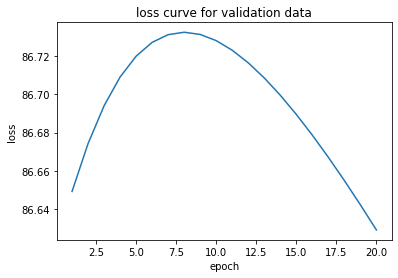

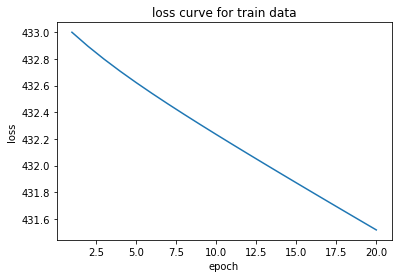

accuracy is  50.4 %
loss value for train data per epoch :
[433.00061631 432.89587155 432.79949928 432.70935384 432.62385648
 432.5418442  432.46245919 432.38506775 432.30920091 432.23451097
 432.16073949 432.08769393 432.01523041 431.94324105 431.87164468
 431.80037998 431.72940039 431.65867043 431.58816285 431.51785666]
loss value for validation data per epoch :
[86.64936726 86.67431741 86.69399346 86.70897704 86.71981625 86.72701682
 86.73103816 86.73229285 86.73114802 86.72792807 86.72291803 86.71636716
 86.70849266 86.69948322 86.68950228 86.67869118 86.6671719  86.65504956
 86.64241463 86.62934489]
plot for learning rate : 0.001 , batch size : 32  and regularisation coeff : 0.1


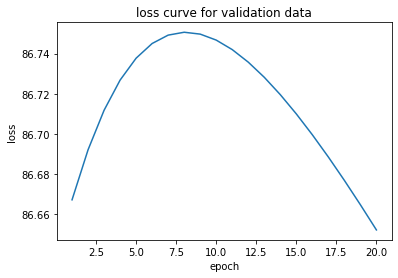

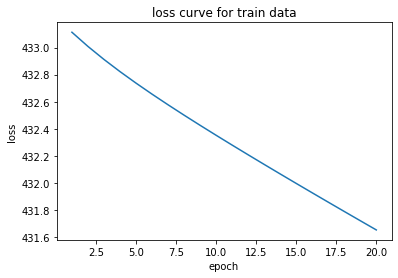

accuracy is  50.8 %
loss value for train data per epoch :
[433.11350372 433.00873319 432.91246474 432.822552   432.73741544
 432.65589132 432.57712106 432.50047019 432.42546898 432.35176896
 432.27911093 432.2073016  432.13619632 432.06568646 431.99569012
 431.92614521 431.85700447 431.78823164 431.71979878 431.65168417]
loss value for validation data per epoch :
[86.66706747 86.69202551 86.71173902 86.72678942 86.7377246  86.74505007
 86.74922504 86.75066188 86.7497275  86.74674611 86.74200254 86.73574584
 86.72819304 86.71953259 86.70992778 86.69951974 86.68843026 86.67676426
 86.66461205 86.65205121]
plot for learning rate : 0.001 , batch size : 32  and regularisation coeff : 1


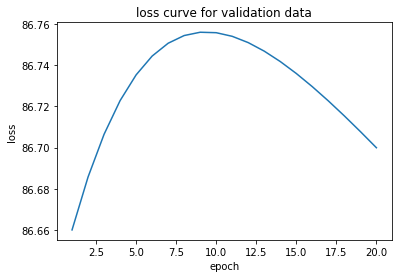

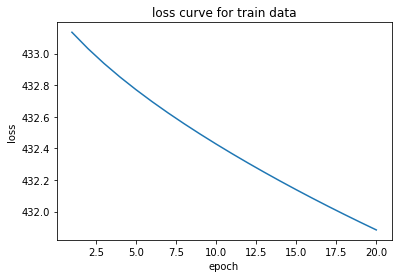

accuracy is  50.8 %
loss value for train data per epoch :
[433.13489313 433.03144691 432.93775154 432.85162985 432.77147189
 432.69608404 432.62457834 432.55629153 432.49072568 432.42750471
 432.36634241 432.30701908 432.24936425 432.19324406 432.13855194
 432.08520173 432.03312259 431.98225531 431.93254947 431.8839614 ]
loss value for validation data per epoch :
[86.66003583 86.68573102 86.70646109 86.72279941 86.73528609 86.74441912
 86.75065046 86.75438544 86.75598417 86.75576428 86.7540042  86.75094681
 86.74680311 86.74175572 86.73596225 86.72955832 86.72266036 86.71536807
 86.70776666 86.69992877]
plot for learning rate : 0.001 , batch size : 64  and regularisation coeff : 0.01


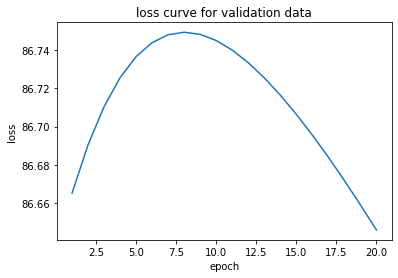

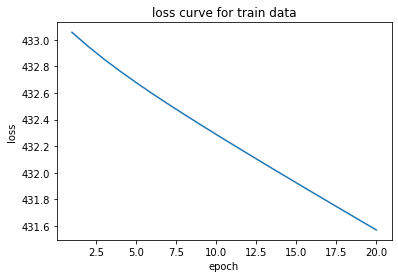

accuracy is  50.4 %
loss value for train data per epoch :
[433.05708787 432.95198873 432.85535972 432.76501796 432.67935963
 432.59720507 432.51768547 432.44016005 432.36415537 432.28932096
 432.21539681 432.14218953 432.06955487 431.99738489 431.92559852
 431.85413465 431.78294696 431.71200025 431.64126753 431.57072809]
loss value for validation data per epoch :
[86.66514992 86.69043803 86.71038422 86.72557907 86.73657916 86.74389792
 86.74800164 86.74930886 86.74819186 86.74497938 86.73996012 86.73338642
 86.72547799 86.71642558 86.70639436 86.69552705 86.68394671 86.67175938
 86.65905621 86.64591558]
plot for learning rate : 0.001 , batch size : 64  and regularisation coeff : 0.1


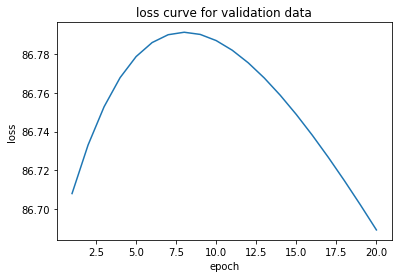

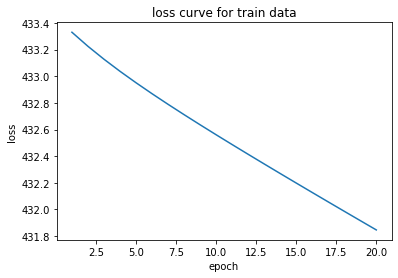

accuracy is  50.8 %
loss value for train data per epoch :
[433.33033971 433.22484141 433.12785508 433.0372039  432.95128845
 432.86893219 432.78926854 432.71165825 432.63562894 432.56083085
 432.4870044  432.41395644 432.34154282 432.2696556  432.19821362
 432.12715563 432.05643516 431.98601676 431.91587324 431.84598362]
loss value for validation data per epoch :
[86.70794611 86.73304881 86.7528403  86.76790934 86.77881078 86.78605643
 86.79011115 86.79139214 86.79027051 86.78707395 86.78209024 86.77557088
 86.76773486 86.75877231 86.74884781 86.73810358 86.72666227 86.71462949
 86.70209609 86.6891401 ]
plot for learning rate : 0.001 , batch size : 64  and regularisation coeff : 1


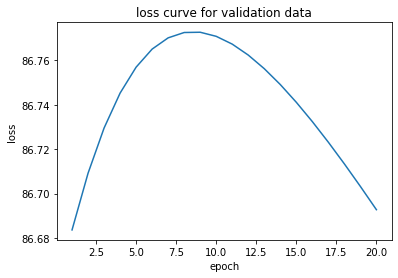

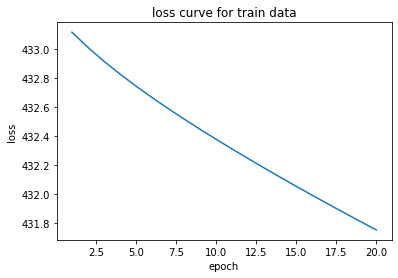

accuracy is  50.8 %
loss value for train data per epoch :
[433.11328194 433.00895458 432.91381928 432.8256778  432.7429126
 432.66433155 432.58905432 432.51642928 432.44597273 432.37732437
 432.3102147  432.24444112 432.17985043 432.11632591 432.05377792
 431.9921369  431.9313483  431.87136872 431.81216319 431.75370306]
loss value for validation data per epoch :
[86.68365556 86.70917138 86.72949217 86.7452077  86.75687366 86.76500248
 86.7700594  86.77246176 86.77258059 86.77074328 86.7672371  86.76231291
 86.75618889 86.74905422 86.74107242 86.73238459 86.72311213 86.71335939
 86.70321586 86.69275819]
plot for learning rate : 0.001 , batch size : 128  and regularisation coeff : 0.01


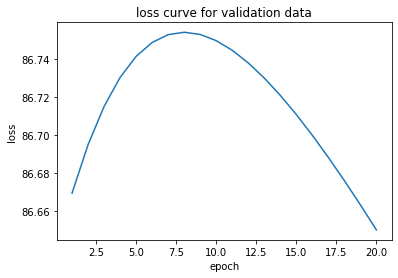

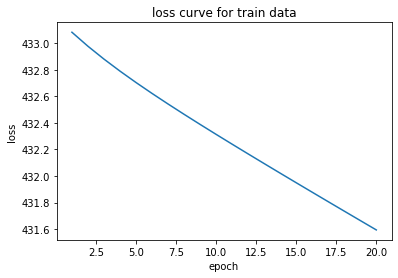

accuracy is  50.8 %
loss value for train data per epoch :
[433.08249416 432.97714449 432.88035295 432.78990012 432.70415899
 432.62193544 432.54235187 432.46476234 432.38869053 432.31378452
 432.23978365 432.16649441 432.09377263 432.0215106  431.94962754
 431.87806259 431.80676969 431.73571383 431.66486822 431.59421227]
loss value for validation data per epoch :
[86.66947055 86.69503551 86.71517676 86.73049976 86.74157425 86.74892501
 86.75302792 86.75430948 86.75314847 86.74987888 86.74479358 86.73814816
 86.73016487 86.72103637 86.71092925 86.69998723 86.68833412 86.67607638
 86.66330547 86.65009986]
plot for learning rate : 0.001 , batch size : 128  and regularisation coeff : 0.1


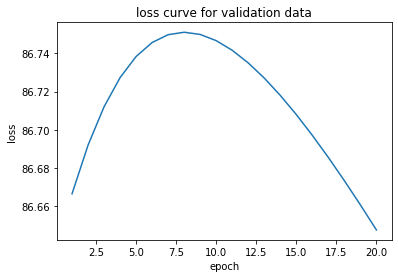

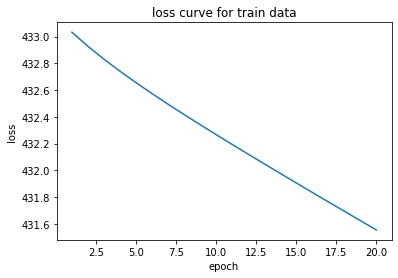

accuracy is  50.8 %
loss value for train data per epoch :
[433.0326615  432.92768686 432.83126661 432.74119095 432.65583981
 432.57402407 432.49486975 432.41773346 432.34214073 432.2677409
 432.19427423 432.12154779 432.04941784 431.97777691 431.90654436
 431.83565939 431.76507597 431.69475904 431.62468176 431.55482345]
loss value for validation data per epoch :
[86.66661733 86.69203642 86.71206083 86.72729369 86.7383025  86.74560997
 86.74969003 86.75096746 86.74981946 86.74657866 86.74153668 86.73494805
 86.72703408 86.7179866  86.70797147 86.6971318  86.68559084 86.6734546
 86.66081411 86.64774748]
plot for learning rate : 0.001 , batch size : 128  and regularisation coeff : 1


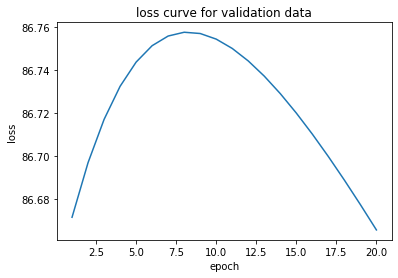

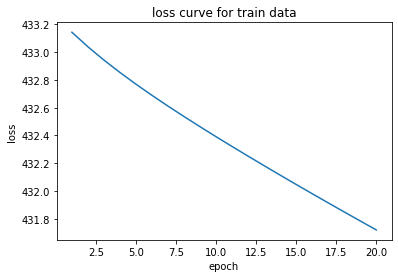

accuracy is  50.4 %
loss value for train data per epoch :
[433.14315955 433.03841054 432.942497   432.85321702 432.76895549
 432.68852618 432.61105646 432.53590318 432.4625913  432.39076901
 432.320175   432.25061446 432.18194155 432.11404656 432.0468465
 431.98027815 431.91429299 431.84885347 431.78393023 431.71950005]
loss value for validation data per epoch :
[86.67158312 86.69693686 86.71699582 86.73235925 86.743591   86.75121035
 86.75568814 86.75744625 86.75685927 86.75425746 86.7499303  86.74413033
 86.7370771  86.72896079 86.7199458  86.71017385 86.69976694 86.6888299
 86.67745269 86.6657124 ]
plot for learning rate : 0.01 , batch size : 32  and regularisation coeff : 0.01


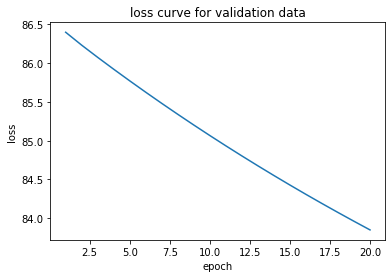

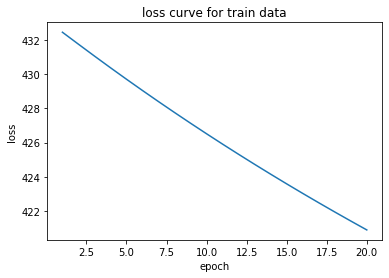

accuracy is  50.0 %
loss value for train data per epoch :
[432.43392091 431.73691862 431.04520797 430.36409976 429.69446759
 429.03629854 428.38940764 427.75357902 427.12859368 426.51423498
 425.91028973 425.31654844 424.73280537 424.15885855 423.59450974
 423.03956448 422.49383204 421.95712543 421.42926132 420.91006011]
loss value for validation data per epoch :
[86.40006925 86.2333312  86.07583333 85.92264819 85.77275633 85.62590345
 85.48198638 85.3409325  85.20267617 85.06715403 84.93430414 84.80406577
 84.67637943 84.55118681 84.42843081 84.30805554 84.19000629 84.07422957
 83.96067305 83.84928561]
plot for learning rate : 0.01 , batch size : 32  and regularisation coeff : 0.1


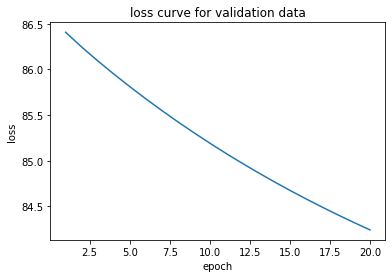

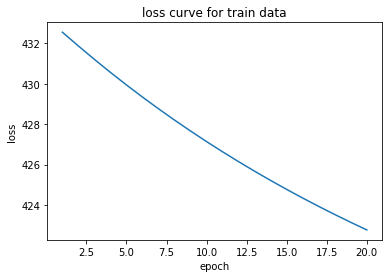

accuracy is  49.6 %
loss value for train data per epoch :
[432.54761714 431.86650407 431.20243688 430.55994565 429.93922565
 429.3396341  428.76039224 428.20072266 427.65987508 427.13713021
 426.63179939 426.14322336 425.67077103 425.21383816 424.77184616
 424.34424095 423.93049176 423.53009014 423.14254889 422.76740111]
loss value for validation data per epoch :
[86.40692427 86.24460589 86.09402319 85.95013505 85.81176886 85.67851719
 85.55013105 85.42640038 85.3071302  85.19213566 85.08124063 84.97427715
 84.87108504 84.77151146 84.67541058 84.58264327 84.49307671 84.40658412
 84.32304447 84.24234216]
plot for learning rate : 0.01 , batch size : 32  and regularisation coeff : 1


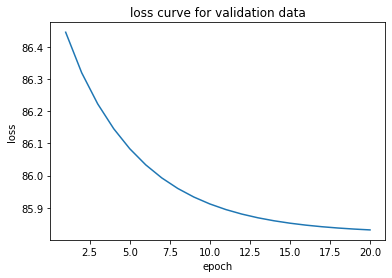

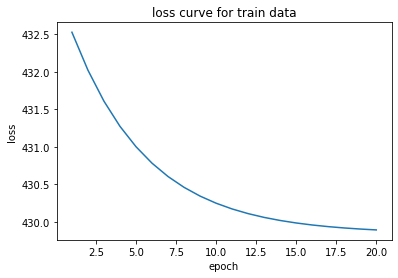

accuracy is  50.0 %
loss value for train data per epoch :
[432.52584596 432.02100209 431.60809905 431.27335644 431.00241611
 430.78310422 430.60551465 430.4616533  430.34507459 430.25057771
 430.17396221 430.11183264 430.06144228 430.02056786 429.9874089
 429.96050673 429.93867924 429.92096813 429.90659642 429.89493402]
loss value for validation data per epoch :
[86.44480219 86.3190203  86.2223166  86.14522535 86.08316032 86.03304177
 85.99252075 85.95973662 85.9331991  85.91170975 85.8943029  85.88019947
 85.8687702  85.85950653 85.8519971  85.84590904 85.84097287 85.83697036
 85.8337247  85.83109266]
plot for learning rate : 0.01 , batch size : 64  and regularisation coeff : 0.01


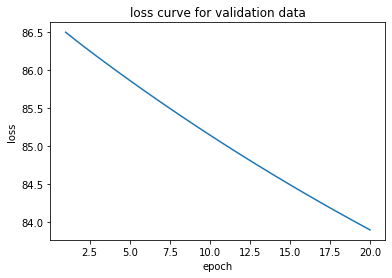

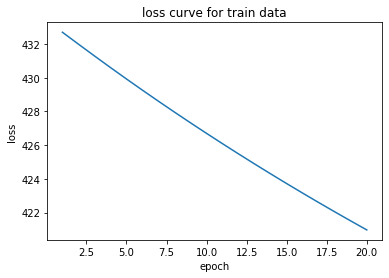

accuracy is  49.6 %
loss value for train data per epoch :
[432.69942835 431.99299764 431.29346401 430.60449897 429.92661151
 429.25972665 428.60366451 427.95822823 427.32322012 426.69844466
 426.08370908 425.47882349 424.88360098 424.29785762 423.72141247
 423.15408764 422.59570828 422.04610259 421.5051018  420.97254021]
loss value for validation data per epoch :
[86.49393668 86.3275011  86.16844971 86.01320959 85.86107853 85.71187822
 85.56552682 85.42196077 85.28112063 85.14294841 85.00738719 84.874381
 84.74387483 84.61581466 84.49014744 84.36682113 84.24578468 84.12698805
 84.01038218 83.89591904]
plot for learning rate : 0.01 , batch size : 64  and regularisation coeff : 0.1


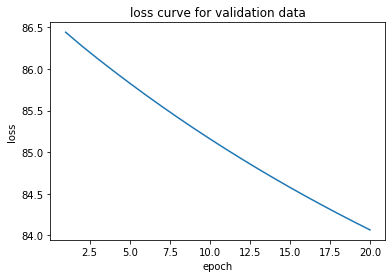

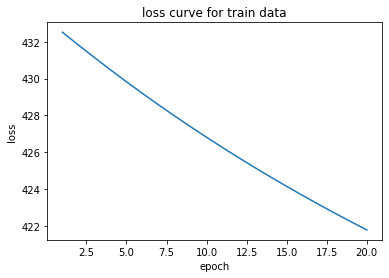

accuracy is  49.6 %
loss value for train data per epoch :
[432.51759311 431.82357353 431.14213675 430.47682336 429.82789097
 429.19500028 428.57771413 427.97558872 427.38819007 426.81509676
 426.25590011 425.710204   425.17762452 424.65778967 424.150339
 423.65492329 423.17120422 422.69885407 422.23755537 421.78700061]
loss value for validation data per epoch :
[86.44240164 86.27888373 86.12421632 85.97461634 85.82928436 85.68796833
 85.55051958 85.4168117  85.28672555 85.16014651 85.03696387 84.9170706
 84.8003633  84.68674202 84.57611021 84.46837462 84.36344516 84.26123482
 84.16165959 84.06463834]
plot for learning rate : 0.01 , batch size : 64  and regularisation coeff : 1


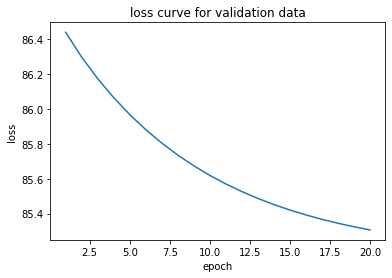

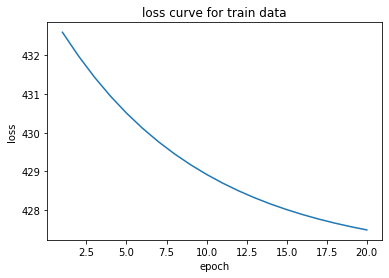

accuracy is  50.0 %
loss value for train data per epoch :
[432.60127642 431.98900662 431.43886417 430.9472357  430.50819624
 430.11601584 429.76554504 429.45221637 429.17198506 428.92126684
 428.69688217 428.49600751 428.31613299 428.15502554 428.01069669
 427.88137445 427.76547865 427.66159928 427.56847746 427.48498867]
loss value for validation data per epoch :
[86.43838489 86.29580762 86.17277295 86.06394321 85.96712179 85.8808356
 85.80387428 85.73518855 85.67385684 85.6190665  85.57009953 85.5263206
 85.4871668  85.45213884 85.42079334 85.39273623 85.36761694 85.34512334
 85.32497733 85.30693095]
plot for learning rate : 0.01 , batch size : 128  and regularisation coeff : 0.01


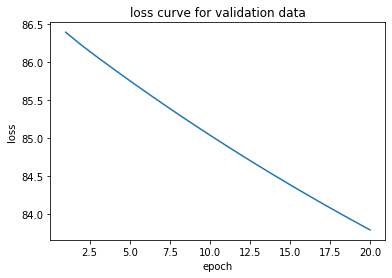

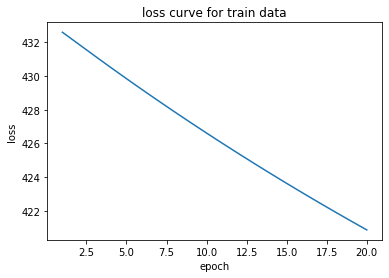

accuracy is  49.6 %
loss value for train data per epoch :
[432.59312706 431.89942792 431.20381343 430.51719908 429.84113173
 429.17568643 428.52071342 427.87603041 427.24145217 426.61679509
 426.00187794 425.39652205 424.80055136 424.21379245 423.63607458
 423.06722971 422.50709253 421.95550047 421.41229368 420.87731509]
loss value for validation data per epoch :
[86.39342071 86.22143376 86.06251471 85.90807014 85.7567385  85.60826211
 85.4625532  85.31955077 85.17919855 85.0414417  84.90622628 84.77349924
 84.64320837 84.51530235 84.38973075 84.26644404 84.1453936  84.02653174
 83.90981165 83.79518747]
plot for learning rate : 0.01 , batch size : 128  and regularisation coeff : 0.1


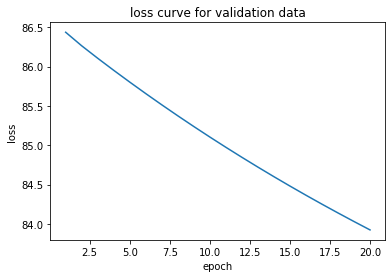

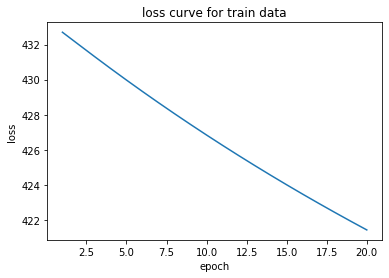

accuracy is  49.6 %
loss value for train data per epoch :
[432.70449774 432.01190718 431.32055509 430.64116845 429.97515531
 429.32246391 428.68282334 428.05593485 427.44150108 426.83923055
 426.2488383  425.67004593 425.10258151 424.54617955 424.00058085
 423.46553248 422.94078763 422.42610551 421.92125129 421.42599594]
loss value for validation data per epoch :
[86.43579374 86.26368436 86.10531531 85.95208218 85.8025926  85.65655624
 85.5138536  85.37439315 85.2380894  85.10485954 84.97462289 84.84730079
 84.72281663 84.60109574 84.48206542 84.36565489 84.25179528 84.14041955
 84.03146251 83.92486075]
plot for learning rate : 0.01 , batch size : 128  and regularisation coeff : 1


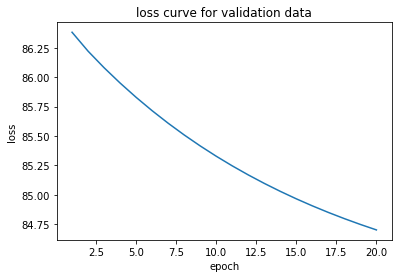

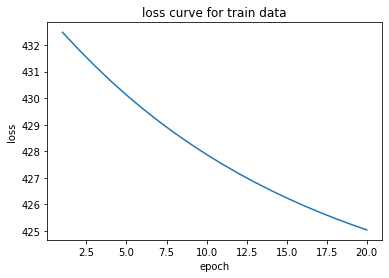

accuracy is  49.2 %
loss value for train data per epoch :
[432.48041127 431.84165512 431.23069176 430.65607424 430.11698322
 429.61128572 429.13679481 428.69145162 428.27334211 427.88068961
 427.51184438 427.16527364 426.83955233 426.53335471 426.24544663
 425.97467853 425.71997897 425.4803488  425.25485568 425.04262922]
loss value for validation data per epoch :
[86.3815629  86.22081638 86.08007671 85.94995353 85.82847508 85.71484404
 85.6084821  85.50888005 85.41557172 85.32812713 85.24614899 85.1692698
 85.0971494  85.02947264 84.96594735 84.90630246 84.85028629 84.79766501
 84.74822121 84.70175261]
plot for learning rate : 0.1 , batch size : 32  and regularisation coeff : 0.01


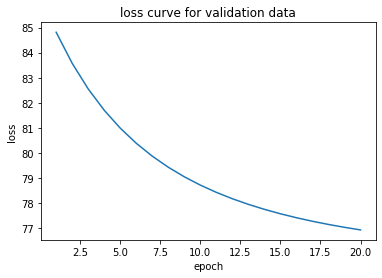

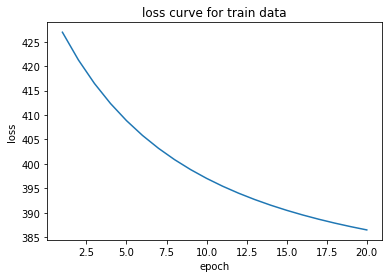

accuracy is  50.0 %
loss value for train data per epoch :
[426.92706552 421.2498708  416.4484225  412.35936805 408.85164588
 405.82098886 403.18455288 400.87631301 398.84335794 397.04299778
 395.4405376  394.00757076 392.72066949 391.56037616 390.51042179
 389.55711658 388.68887143 387.89581949 387.16951495 386.50269149]
loss value for validation data per epoch :
[84.81371991 83.57423119 82.55087755 81.69942633 80.98516228 80.38111673
 79.86635637 79.42455825 79.0429002  78.71122279 78.4214038  78.16689202
 77.94235844 77.74343352 77.56650767 77.40857833 77.26713177 77.14005089
 77.02554271 76.92208092]
plot for learning rate : 0.1 , batch size : 32  and regularisation coeff : 0.1


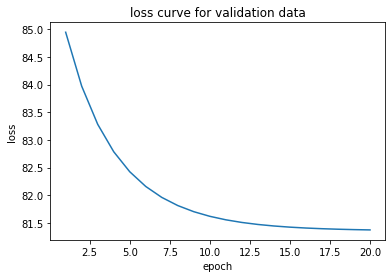

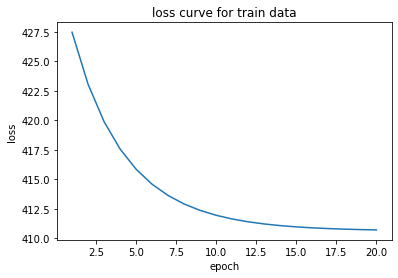

accuracy is  50.4 %
loss value for train data per epoch :
[427.47179556 423.06254334 419.8847078  417.56401995 415.85115637
 414.57622309 413.62096056 412.90150368 412.35744111 411.9446955
 411.63077392 411.39152571 411.2088836  411.06926172 410.96240242
 410.88053595 410.8177618  410.76958968 410.73259668 410.70416981]
loss value for validation data per epoch :
[84.9487686  83.97303646 83.2823124  82.78546342 82.42338726 82.15678539
 81.95888724 81.81105885 81.70008949 81.61647007 81.55327115 81.5053932
 81.46905394 81.44143081 81.42040727 81.40439014 81.39217662 81.38285645
 81.37573952 81.37030175]
plot for learning rate : 0.1 , batch size : 32  and regularisation coeff : 1


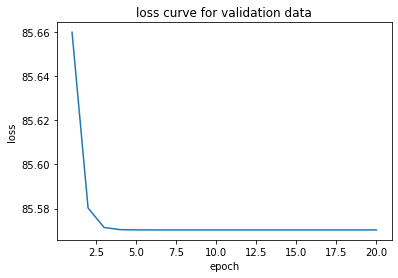

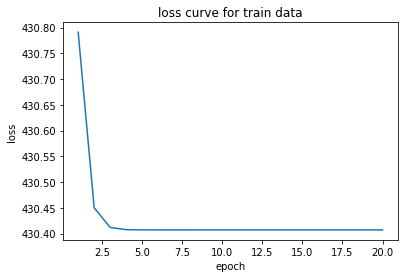

accuracy is  50.0 %
loss value for train data per epoch :
[430.79099806 430.45011511 430.41205756 430.40779715 430.40731979
 430.40726627 430.40726026 430.40725959 430.40725951 430.40725951
 430.4072595  430.4072595  430.4072595  430.4072595  430.4072595
 430.4072595  430.4072595  430.4072595  430.4072595  430.4072595 ]
loss value for validation data per epoch :
[85.65992925 85.58026064 85.57142311 85.57044005 85.57033061 85.57031842
 85.57031707 85.57031691 85.5703169  85.57031689 85.57031689 85.57031689
 85.57031689 85.57031689 85.57031689 85.57031689 85.57031689 85.57031689
 85.57031689 85.57031689]
plot for learning rate : 0.1 , batch size : 64  and regularisation coeff : 0.01


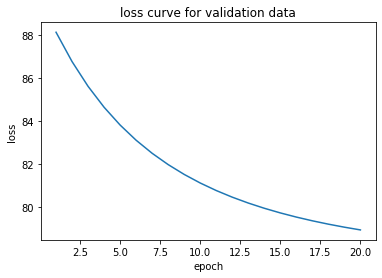

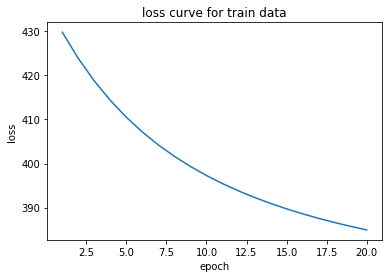

accuracy is  48.4 %
loss value for train data per epoch :
[429.7830483  423.83859256 418.7278277  414.31703383 410.48951477
 407.1490824  404.21703844 401.62913256 399.33284551 397.28510433
 395.4504219  393.79940758 392.3075843  390.95445186 389.7227445
 388.59784108 387.56729458 386.62045504 385.74816593 384.9425183 ]
loss value for validation data per epoch :
[88.11541431 86.75567998 85.60930948 84.64043496 83.81710947 83.11337363
 82.50832297 81.98516305 81.53037733 81.13304151 80.78427717 80.47682368
 80.20470502 79.96297081 79.74749457 79.55481593 79.38201649 79.22662167
 79.08652255 78.9599132 ]
plot for learning rate : 0.1 , batch size : 64  and regularisation coeff : 0.1


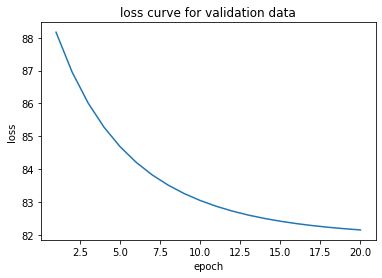

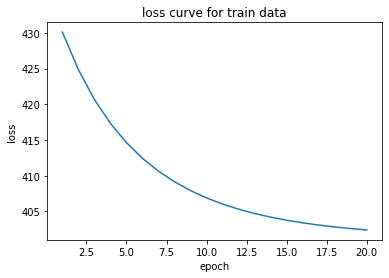

accuracy is  46.400000000000006 %
loss value for train data per epoch :
[430.09894389 424.8435692  420.67027155 417.32935549 414.63146871
 412.43557509 410.63569273 409.15131774 407.92059788 406.89547246
 406.03819444 405.31882044 404.71338035 404.20252759 403.77053212
 403.40452071 403.09389715 402.82989517 402.60523002 402.41382453]
loss value for validation data per epoch :
[88.1668584  86.95950884 86.016799   85.27478029 84.68485193 84.21148039
 83.82847016 83.51629554 83.26022562 83.04901094 82.87395941 82.72828064
 82.60661569 82.50469601 82.41909304 82.34703222 82.28625322 82.23490373
 82.19145788 82.15465296]
plot for learning rate : 0.1 , batch size : 64  and regularisation coeff : 1


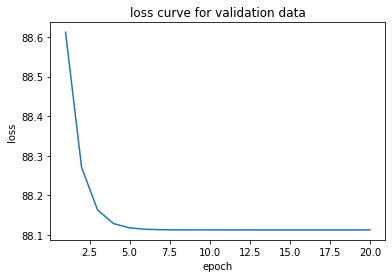

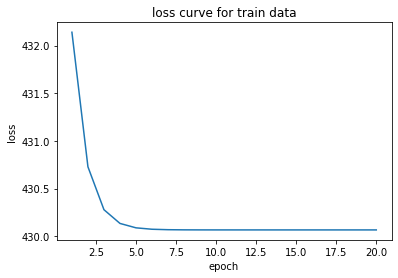

accuracy is  50.8 %
loss value for train data per epoch :
[432.14001958 430.72849994 430.27854736 430.13462092 430.0884538
 430.07362557 430.06885905 430.06732582 430.06683233 430.06667339
 430.06662217 430.06660566 430.06660033 430.06659861 430.06659805
 430.06659787 430.06659781 430.06659779 430.06659779 430.06659779]
loss value for validation data per epoch :
[88.61180684 88.27087096 88.16283897 88.12859657 88.11771151 88.11424728
 88.11314408 88.11279261 88.11268058 88.11264487 88.11263347 88.11262984
 88.11262868 88.11262831 88.11262819 88.11262815 88.11262814 88.11262814
 88.11262813 88.11262813]
plot for learning rate : 0.1 , batch size : 128  and regularisation coeff : 0.01


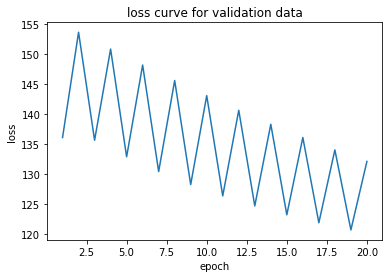

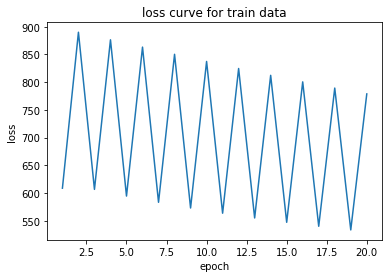

accuracy is  50.0 %
loss value for train data per epoch :
[608.7088339  890.12532831 606.56151956 876.48187604 594.48132515
 863.31031375 583.24947687 850.3176752  572.9449344  837.40976378
 563.54720042 824.69498825 554.97661409 812.36111081 547.14089164
 800.56228025 539.964832   789.3753063  533.39606878 778.80898702]
loss value for validation data per epoch :
[136.09838658 153.62631049 135.65394932 150.82849743 132.89519218
 148.17046324 130.43645288 145.59402432 128.27764863 143.07893563
 126.38813331 140.64109293 124.72500978 138.31005071 123.24705974
 136.10923284 121.92197566 134.04855143 120.72727779 132.12622899]
plot for learning rate : 0.1 , batch size : 128  and regularisation coeff : 0.1


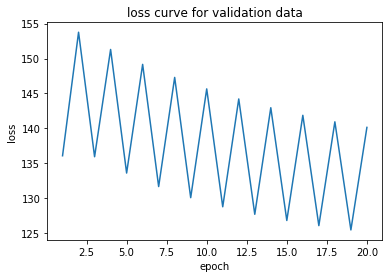

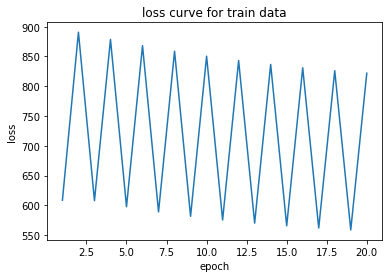

accuracy is  50.0 %
loss value for train data per epoch :
[608.59092574 890.75313419 607.75005849 878.73996748 597.58592712
 868.20780912 588.88595834 858.85995616 581.50516955 850.53424892
 575.26981207 843.15471194 570.00804285 836.66831703 565.56560035
 831.01596031 561.81069376 826.12660288 558.63317874 821.92152017]
loss value for validation data per epoch :
[136.06165999 153.76525284 135.92195767 151.2961447  133.58379115
 149.1605517  131.64702217 147.29004454 130.05535621 145.64467676
 128.74891853 144.20214424 127.67382878 142.94587917 126.78536098
 141.85959698 126.04775975 140.92604915 125.43283357 140.12758569]
plot for learning rate : 0.1 , batch size : 128  and regularisation coeff : 1


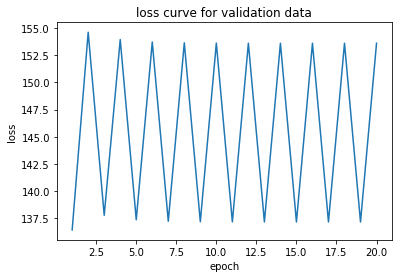

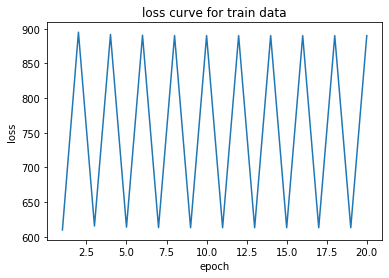

accuracy is  50.0 %
loss value for train data per epoch :
[610.04009691 894.93774621 615.66148951 891.69240102 613.99775895
 890.60165057 613.44060891 890.23909505 613.25447781 890.11853145
 613.19233458 890.07843017 613.17158954 890.06508917 613.16466404
 890.06064997 613.16235184 890.05917254 613.16157978 890.05868073]
loss value for validation data per epoch :
[136.42358078 154.61187858 137.76595136 153.93915868 137.35818044
 153.71428305 137.22201535 153.63965649 137.17656399 153.61486862
 137.16139228 153.60663202 137.15632768 153.60389448 137.15463692
 153.60298445 137.15407244 153.60268188 137.15388397 153.60258126]


In [35]:
reg_coeff_list=[1e-2,1e-1,1]
for l_rate in learning_rate_lst:
    for batch_s in batch_size_lst:
        for reg_c in reg_coeff_list:
            print("plot for learning rate :",l_rate,", batch size :",batch_s," and regularisation coeff :",reg_c)
            obj=logistic_regression_regularisation(l_rate,batch_s,reg_c)
            obj.SGD()
            obj.plot_loss_curve()
            obj.plot_loss_curve_train()
            obj.calculate_accuracy()
            obj.loss_per_epoch()

overfitting cases:
learning rate : 0.001 , batch size : 32  and regularisation coeff : 1
